In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer


In [3]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.sample(10)

,Survived,Age,Fare
543,1,32.0,26.0000
13,0,39.0,31.2750
737,1,35.0,512.3292
861,0,21.0,11.5000
423,0,28.0,14.4000
749,0,31.0,7.7500
740,1,NaN,30.0000
170,0,61.0,33.5000
65,1,NaN,15.2458
109,1,NaN,24.1500


In [5]:
df.dropna(inplace=True)

# Applying train test split

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
clf = DecisionTreeClassifier()


In [9]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [10]:
accuracy_score(y_test,y_pred)*100

63.63636363636363

# Applying discritization

In [68]:
kbin=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')

In [69]:
trf=ColumnTransformer([
    ('age',kbin,['Age']),
    ('fare',kbin,['Fare'])
])

In [70]:
X_train_trf=trf.fit_transform(X_train)

In [71]:
X_test_trf=trf.transform(X_test)

In [72]:
# creating dataframe with discritize values

In [73]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [74]:
output.sample(10)

,age,age_trf,fare,fare_trf
634,9.0,1.0,27.900,0.0
682,20.0,2.0,9.225,0.0
855,18.0,2.0,9.350,0.0
80,22.0,2.0,9.000,0.0
13,39.0,4.0,31.275,0.0
735,28.5,3.0,16.100,0.0
37,21.0,2.0,8.050,0.0
630,80.0,9.0,30.000,0.0
785,25.0,3.0,7.250,0.0
636,32.0,3.0,7.925,0.0


In [75]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2)*100

67.83216783216784

# custom function which apply discritization and display difference with the help of histogram and saves alot of time

In [8]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))*100)
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

C:\Users\zuhai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\zuhai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


63.591549295774655


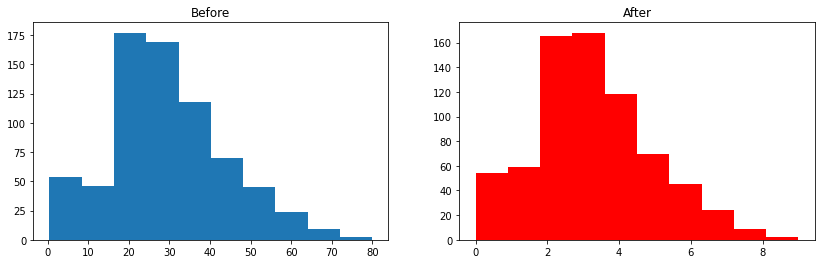

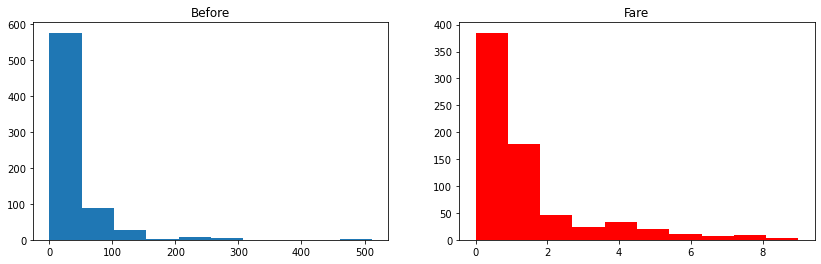

In [9]:
discretize(10,'kmeans')

C:\Users\zuhai\anaconda3\envs\AI\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


63.0320813771518


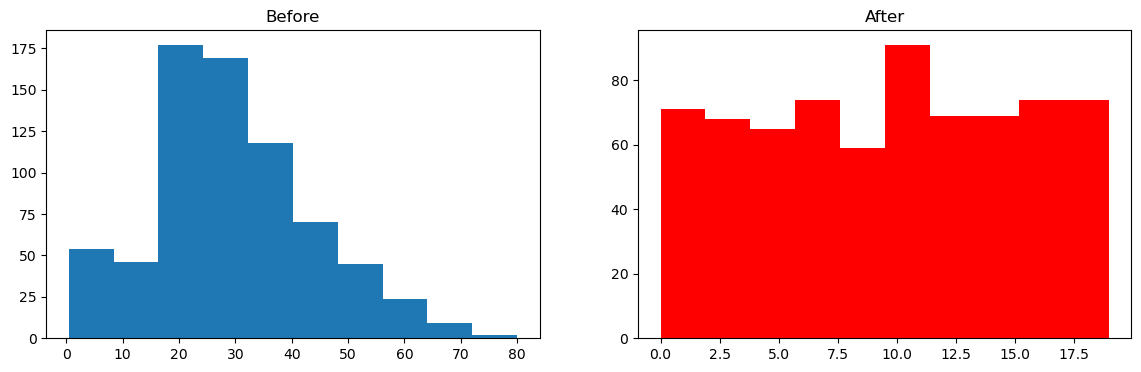

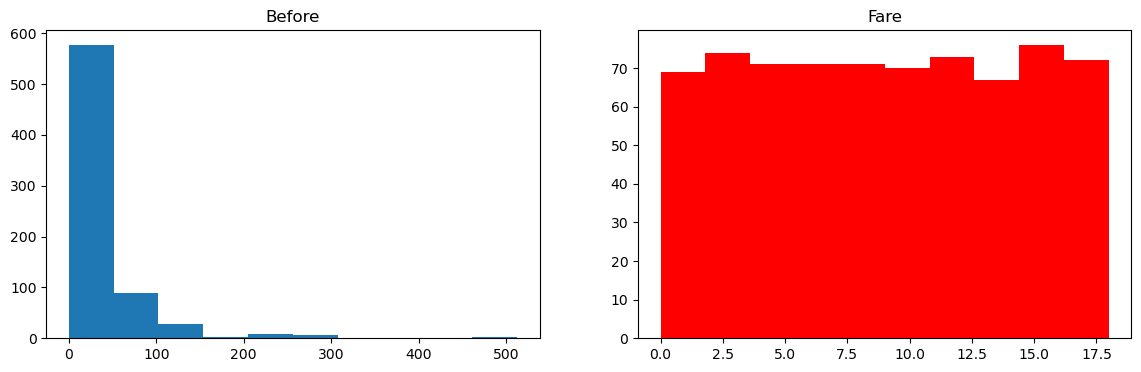

In [38]:
discretize(20,'quantile')

63.30985915492958


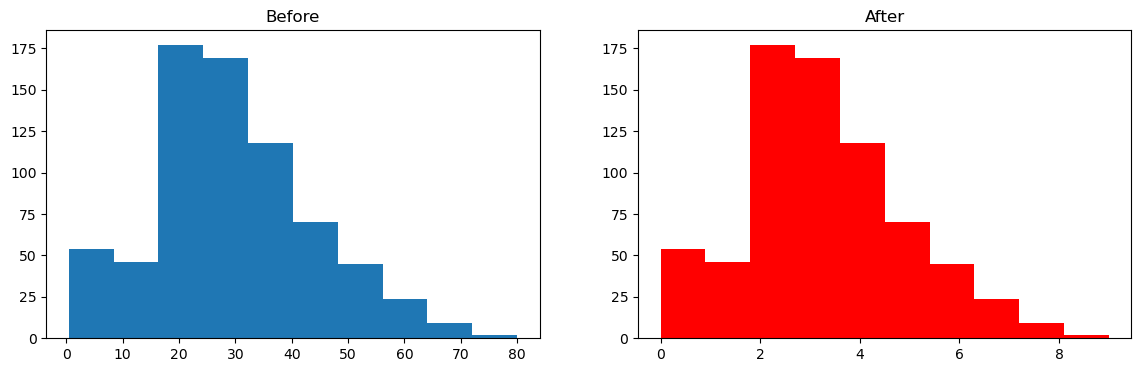

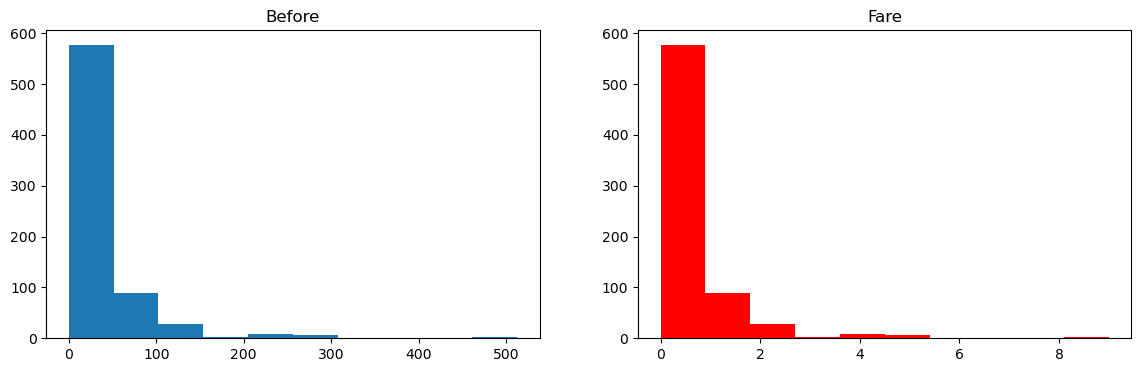

In [37]:
discretize(10,'uniform')